In [1]:
try:
    from undi import MuonNuclearInteraction
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('/home/misah/PARMA/WORK/undi-master/undi/')
    from undi import MuonNuclearInteraction
import matplotlib.pyplot as plt
import numpy as np

In [2]:
angtom=1.0e-10 # m
a=9.5672616959 # V3Ge supercell lattice constant, in Angstrom

V_Quadrupole_moment =  -0.05e-28 # m^-2
atoms = [
    
    {'Position': np.array([0.000,   0.124923365,   0.248753006]) * a * angtom,
     'Label': 'mu'},

    {'Position': np.array([0.0,   0.256920829,   0.118611046])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     # 'OmegaQmu': 3.2e6 # s^-1
    },
    
    {'Position': np.array([0.0,   0.254298948,   0.381177541])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     # 'OmegaQmu': 3.2e6 # s^-1
    },
    
    {'Position': np.array([0.131381043,  -0.0,   0.249651988])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     # 'OmegaQmu': 3.2e6 # s^-1
    },
    
    {'Position': np.array([0.868623816,  -0.0,   0.249647986])*angtom*a,
    'Label': 'V',
    'ElectricQuadrupoleMoment': V_Quadrupole_moment,
    # 'OmegaQmu': 3.2e6 # s^-1
    },
#    
#    {'Position': np.array([0.5    ,    0.5   ,     0.0])*angtom*a,
#    'Label': 'V',
#    'ElectricQuadrupoleMoment': V_Quadrupole_moment,
#    # 'OmegaQmu': 3.2e6 # s^-1
#    },
#    
#    {'Position': np.array([0.5    ,    0.5   ,     1.0])*angtom*a,
#     'Label': 'V',
#     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
#     # 'OmegaQmu': 3.2e6 # s^-1
#    }
]

In [3]:
elementary_charge=1.6021766E-19 # Coulomb = ampere ⋅ second

def Vzz_for_unit_charge_at_distance(r):
    epsilon0 = 8.8541878E-12 # ampere^2 ⋅ kilogram^−1 ⋅ meter^−3 ⋅ second^4
    elementary_charge=1.6021766E-19 # Coulomb = ampere ⋅ second
    Vzz = (2./(4 * np.pi * epsilon0)) * (elementary_charge / (r**3))
    return Vzz

def Vzz_from_Celio_PRL():
    # 0.27 angstrom^−3 is from PRL 39 836
    # (4 pi epsilon_0)^−1 (0.27 angstrom^−3) elementary_charge = 3.8879043E20 meter^−2 ⋅ volts
    Vzz = 1.02702 * 3.8879043E20 # the factor 1.02702 gives exactly 3.2e6 s^-1 for omega_q
    return Vzz

def get_V(p_mu, p_N, Vzz):
    x=p_N-p_mu
    n = np.linalg.norm(x)
    x /= n; r = 1. # keeping formula below for clarity
    return -Vzz * ( (3.*np.outer(x,x)-np.eye(3)*(r**2))/r**5 )


for idx, atom in enumerate(atoms):
    if atom['Label'] == 'V':
        atoms[idx]['EFGTensor'] = get_V(atoms[0]['Position'], atom['Position'], \
                                  0*Vzz_for_unit_charge_at_distance(1.77*angtom))
print(1009*Vzz_for_unit_charge_at_distance(1.77*angtom))

5.24026384478656e+23


INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 8192 dimensional


Computing signal 4 times with LF 0.0 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 8192 dimensional


done!
Computing signal 4 times with LF 0.0 T...1...2...3...done!


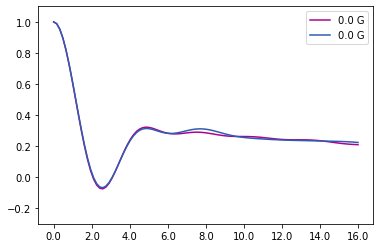

In [4]:
steps = 100
tlist = np.linspace(0, 16e-6, steps)
signals = np.zeros([6,steps], dtype=np.float)

#LongitudinalFields = (0.0, 0.001, 0.003, 0.007, 0.008, 0.01)
LongitudinalFields = (0.0,0.0)
for idx, Bmod in enumerate(LongitudinalFields):

    # Put field along muon polarization, that is always z
    B = Bmod * np.array([0,0.,1.])
    NS = MuonNuclearInteraction(atoms, external_field=B, log_level='info')

    # rotate the sumple such that the muon spin is aligned with
    # the 111 direction (and, just for convenience, the muon position is
    # set to (0,0,0) )
    NS.translate_rotate_sample_vec(np.array([1.,1.,1.]))

    print("Computing signal 4 times with LF {} T...".format(Bmod), end='', flush=True)
    signal_Cu = NS.celio(tlist,  k=2)
    
    for i in range(3):
        print('{}...'.format(i+1), end='', flush=True)
        signal_Cu += NS.celio(tlist, k=2)
    print('done!')
    signal_Cu /= float(i+1+1)
    del NS

    signals[idx]=signal_Cu

"""
...and the results is:
"""

fig, axes = plt.subplots(1,1)
for i, Bmod in enumerate(LongitudinalFields):
    color = list(np.random.choice(range(256), size=3)/256)
    axes.plot(tlist, signals[i], label='{} G'.format(Bmod*1e4), linestyle='-', color=color)
axes.set_ylim((-0.3,1.1))
ticks = np.round(axes.get_xticks()*10.**6)
axes.set_xticklabels(ticks)
plt.legend()
plt.show()

In [5]:
# fig, axes = plt.subplots(1,1)
# for i, Bmod in enumerate(efgray):
#     color = list(np.random.choice(range(256), size=3)/256)
#     axes.plot(tlist, signals[i], label='{} X efg'.format(Bmod*1), linestyle='-', color=color)
# axes.set_ylim((-0.3,1.1))
# ticks = np.round(axes.get_xticks()*10.**6)
# axes.set_xticklabels(ticks)
# plt.legend()
# plt.show()